# Getting started


(1280, 853, 3)


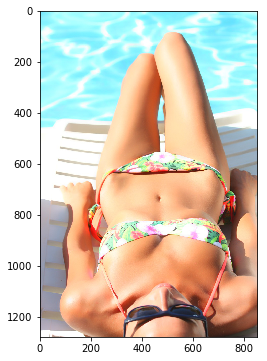

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

plt.rcParams["figure.figsize"] = [6, 6]
image = mpimg.imread('woman.jpg')
size = image.shape
print(size)
plt.imshow(image)
plt.show()

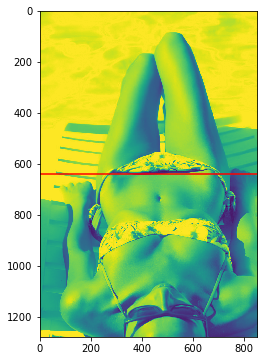

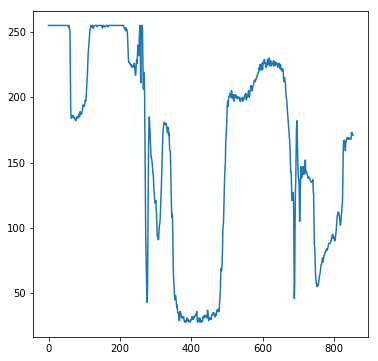

In [2]:
# green channel RGB
im_green = image[:, :, 1]
plt.imshow(im_green)
line_width = size[1] - 1
line_pos = size[0] // 2
plt.plot([0, line_width], [line_pos, line_pos], color='r')
plt.show()

# show value under red line
plt.plot(im_green[line_pos, :])
plt.show()

## Crop image

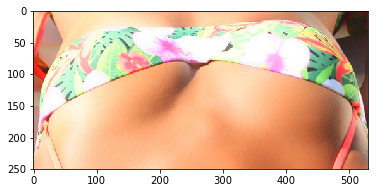

(250, 530, 3)


In [3]:
im_cropped = image[800:1050, 220:750]
plt.imshow(im_cropped)
plt.show()
print(im_cropped.shape)

## Brightness - Darkness

60 315
60 255
-60 195
0 195


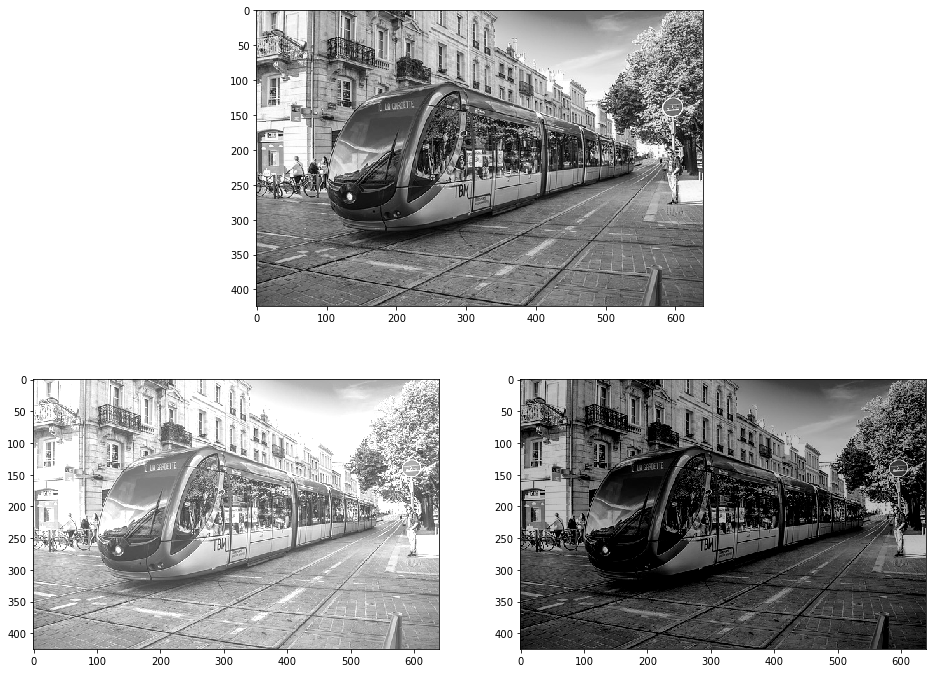

In [4]:
img_tram = mpimg.imread('tramway.jpg')
img_tram_gray = cv2.cvtColor(img_tram, cv2.COLOR_RGB2GRAY)

img_tram_gray_light = np.add(img_tram_gray.astype(int), 60)
img_tram_gray_dark = np.subtract(img_tram_gray.astype(int), 60)

# cut values outside of 0..255 range
print(np.min(img_tram_gray_light), np.max(img_tram_gray_light))
np.clip(img_tram_gray_light, 0, 255, out=img_tram_gray_light) 
print(np.min(img_tram_gray_light), np.max(img_tram_gray_light))

print(np.min(img_tram_gray_dark), np.max(img_tram_gray_dark))
np.clip(img_tram_gray_dark, 0, 255, out=img_tram_gray_dark) 
print(np.min(img_tram_gray_dark), np.max(img_tram_gray_dark))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(2, 2, (1, 2))
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax1.imshow(img_tram_gray, cmap='gray')
ax2.imshow(img_tram_gray_light, cmap='gray', vmin=0, vmax=255)
ax3.imshow(img_tram_gray_dark, cmap='gray', vmin=0, vmax=255) # vmin=0, vmax=255 required especially for dark
plt.show()


## Merge images

Important convert array to type astype(int) before cell wise adding images arrays.

(425, 640, 3)


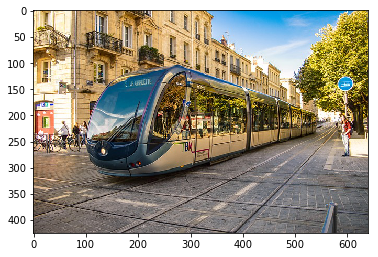

(425, 640, 3)


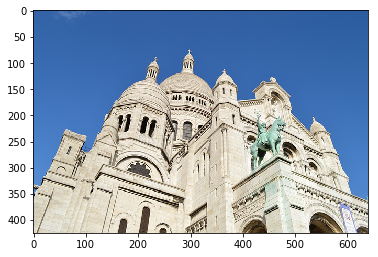

In [5]:
img_1 = mpimg.imread('tramway.jpg')
img_2 = mpimg.imread('sacred.jpg')

print(img_1.shape)
plt.imshow(img_1)
plt.show()

print(img_2.shape)
plt.imshow(img_2)
plt.show()


(425, 640) (425, 640)


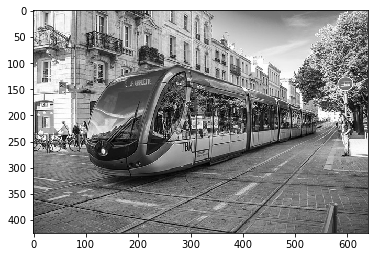

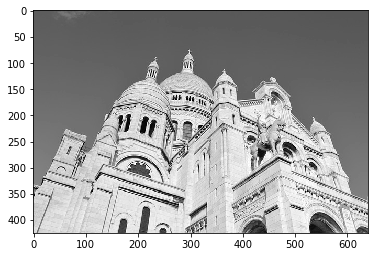

In [6]:
# make gray scaled
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
print(gray_1.shape, gray_2.shape)
plt.imshow(gray_1, cmap='gray')
plt.show()
plt.imshow(gray_2, cmap='gray')
plt.show()

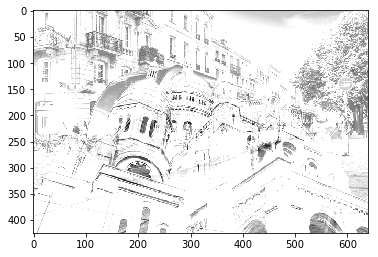

In [7]:
merged_1 = np.add(gray_1.astype(int), gray_2.astype(int))
np.clip(merged_1, 0, 255, out=merged_1) 
merged_1 = merged_1.astype(dtype=np.uint8)
plt.imshow(merged_1, cmap='gray')

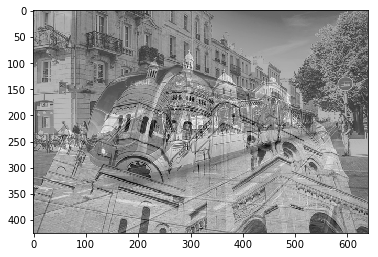

In [8]:
merged_2 = np.add(gray_1.astype(int) / 2, gray_2.astype(int) / 2)
merged_2 = merged_2.astype(dtype=np.uint8)
plt.imshow(merged_2, cmap='gray')

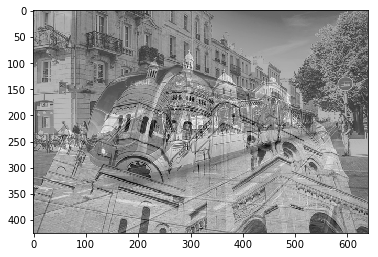

In [9]:
merged_3 = np.add(gray_1.astype(int), gray_2.astype(int)) / 2
merged_3 = merged_3.astype(dtype=np.uint8)
plt.imshow(merged_3, cmap='gray')

In [10]:
print(merged_2[0, 0:15])
print(merged_3[0, 0:15])
print(np.sum(np.subtract(merged_2, merged_3)))

[106 106 100 125 167 145 142 130 161 155 161 140 153 141 106]
[106 106 100 125 167 145 142 130 161 155 161 140 153 141 106]
0


[106 106 100 125 167 145 142 130 161 155 161 140 153 141 106]
[106 106 100 125 167 145 142 130 161 155 161 140 153 141 106]
[106 106 100 125 167 145 142 130 161 155 161 140 153 141 106]


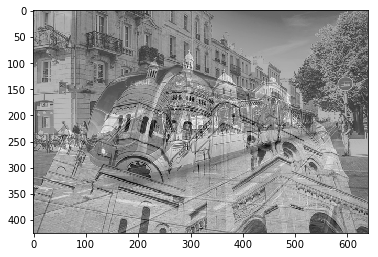

In [11]:
# shorted syntax
merged_4 = np.add(gray_1, gray_2, dtype=int) / 2
merged_4 = merged_4.astype(dtype=np.uint8)
plt.imshow(merged_4, cmap='gray')
print(merged_2[0, 0:15])
print(merged_3[0, 0:15])
print(merged_4[0, 0:15])

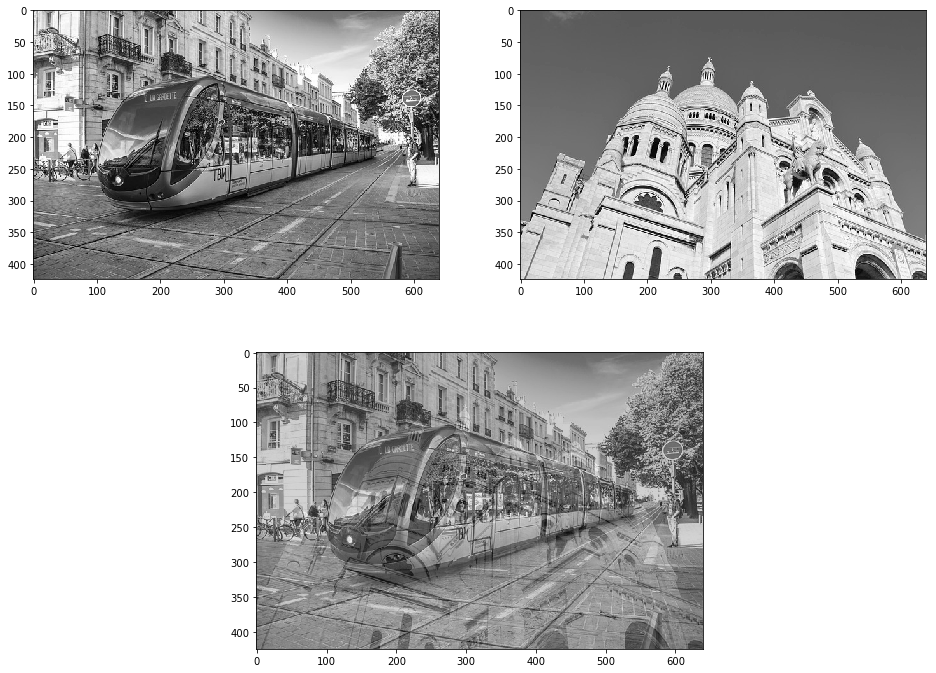

In [12]:
def blend(a, b, alpha):
    a_1 = a.astype(int) * alpha
    b_1 = b.astype(int) * (1.0 - alpha)
    result = np.add(a_1, b_1).astype(np.uint8)
    return result


fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, (3,4))

ax1.imshow(gray_1, cmap='gray', vmin = 0, vmax = 255)
ax2.imshow(gray_2, cmap='gray', vmin = 0, vmax = 255)
ax3.imshow(blend(gray_1, gray_2, 0.7), cmap='gray', vmin = 0, vmax = 255)

plt.show()
